In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [145]:
df_x = pd.read_csv('../data/data_input_001.csv', index_col=0)
df_y = pd.read_csv('../data/data_output_001.csv', index_col=0)
display(df_x, df_y)

,x1,x2
0,-6.146169,-3.245825
1,-1.208457,-3.245825
2,-3.947339,-3.245825
3,6.078557,-3.245825
4,-4.663309,-3.245825
...,...,...
2495,-5.321069,-3.776540
2496,2.848390,-3.776540
2497,0.794819,-3.776540
2498,-5.802189,-3.776540


,y1
0,-0.929861
1,-2.002666
2,-0.291073
3,-1.213052
4,-0.059887
...,...
2495,0.056860
2496,-0.516997
2497,-0.063998
2498,-0.320893


<IPython.core.display.Javascript object>


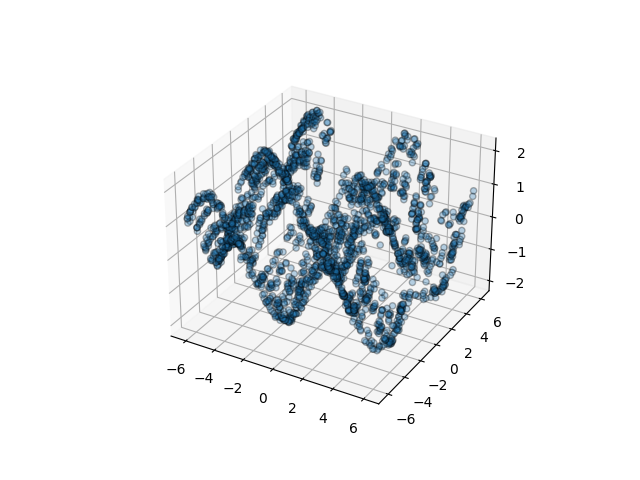

In [146]:
fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')

ax.scatter(df_x['x1'],df_x['x2'],df_y['y1'],
          alpha=0.3,
          edgecolor='black')

In [147]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X = df_x.values
Y = df_y.values
x_s = sc_x.fit_transform(X)
y_s = sc_y.fit_transform(Y)

regressor = SVR(kernel = 'rbf')
regressor.fit(x_s,y_s)

/home/saki606/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [148]:
y_pred = regressor.predict(x_s)
Y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))


<IPython.core.display.Javascript object>


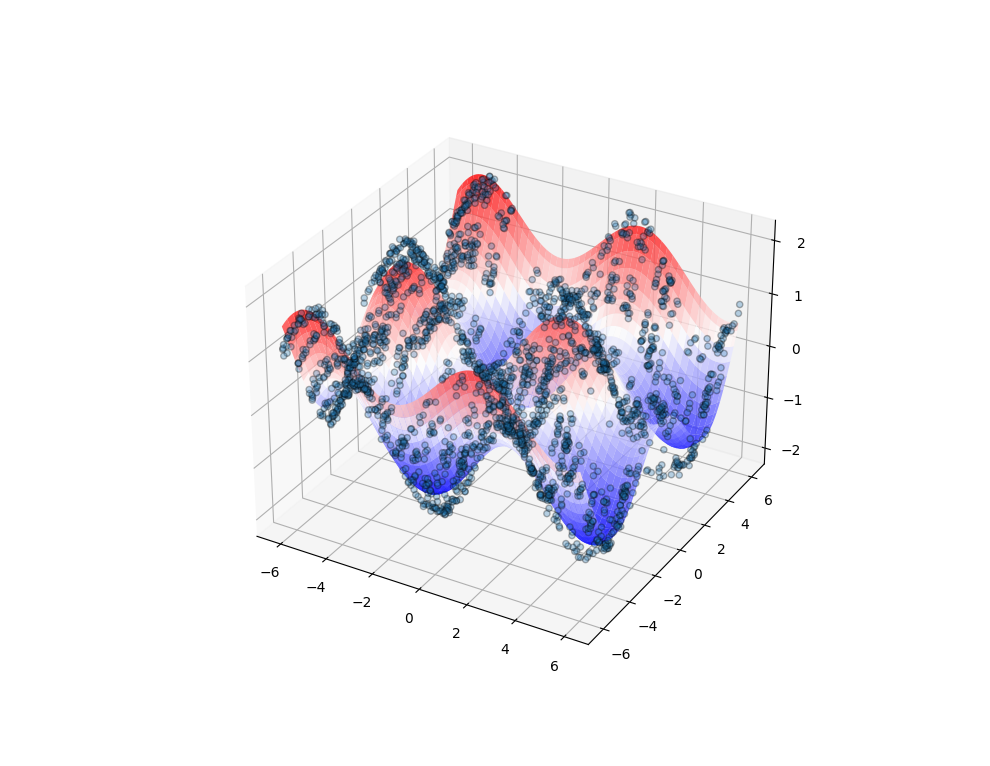

In [151]:
num = 100

surface_x1 = np.linspace(min(df_x.x1),max(df_x.x1),num)
surface_x2 = np.linspace(min(df_x.x2),max(df_x.x2),num)

xx1,xx2 = np.meshgrid(surface_x1,surface_x2)
XX = np.c_[np.ravel(xx1),np.ravel(xx2)]
XX_s = sc_x.transform(XX)

surface_y = regressor.predict(XX_s).reshape(xx1.shape)
surface_y = sc_y.inverse_transform(surface_y.reshape(xx1.shape))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df_x['x1'], df_x['x2'], df_y['y1'], alpha=0.3, edgecolor='black')
ax.plot_surface(xx1, xx2, surface_y, cmap='bwr', linewidth=0, alpha=0.8) 



<IPython.core.display.Javascript object>


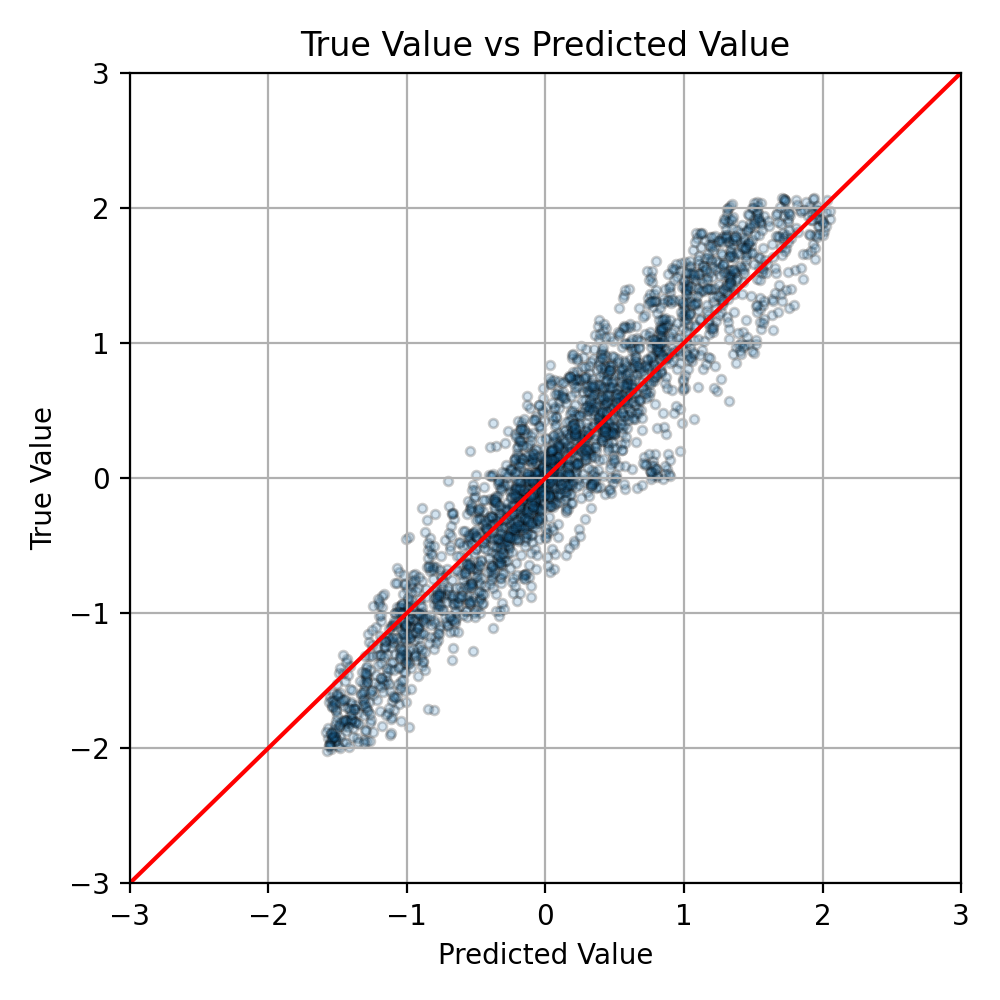

Mean:  0.005342982930254783
std:  0.3178634000614717
MAE:  0.2559202005279092
MSE:  0.3179083021332287
R-squred:  0.8966485732033663
Maximum Error:  0.9088923548077013


In [150]:
fig = plt.figure(figsize=(5, 5), dpi=200)

ax = fig.add_subplot(111)

ax.scatter(Y_pred,Y,
          alpha=0.2,
          edgecolor='black',
          s=10)

ax.plot([-10,10],[-10,10],c='r')

plt.title("True Value vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.grid('True')
plt.xlim(-3,3)
plt.ylim( -3,3)
plt.tight_layout()

YY = Y-Y_pred
print('Mean: ', np.mean(YY))
print('std: ', np.std(YY))
print('MAE: ', np.mean(np.abs(YY)))
print('MSE: ', np.sqrt(sklearn.metrics.mean_squared_error(Y,Y_pred)))
print('R-squred: ', sklearn.metrics.r2_score(Y,Y_pred))
print('Maximum Error: ', np.max(np.abs(YY)))
